In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor #Regressor as continuous values of stock prices
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
import yfinance as yf

In [65]:
stock = "AAPL"   # Apple stock
df2 = yf.download(stock, start="2022-01-01", end="2024-01-01")

/tmp/ipython-input-2769007189.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download(stock, start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [66]:
df2.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.270325,179.122459,174.058687,174.176216,104487900
2022-01-04,176.007767,179.181201,175.439682,178.877573,99310400
2022-01-05,171.325974,176.468103,171.051728,175.919612,94537600
2022-01-06,168.465973,171.698172,168.113369,169.151587,96904000
2022-01-07,168.632523,170.562047,167.515946,169.337730,86709100


In [67]:
df2.shape

(501, 5)

In [68]:
df2.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [69]:
df2.dtypes

,,0
Price,Ticker,
Close,AAPL,float64
High,AAPL,float64
Low,AAPL,float64
Open,AAPL,float64
Volume,AAPL,int64


In [70]:
df2.isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [71]:
df2["Next_Close"] = df2["Close"].shift(-1)
df2.dropna(inplace=True)

In [72]:
x = df2[["Open", "High", "Low", "Volume"]]
y = df2["Next_Close"]

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
model = RandomForestRegressor(n_estimators=200, random_state=42)    #200 trees
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [75]:
y_pred = model.predict(x_test)


In [76]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 11.53979227437311
R² Score: 0.9571572855935431


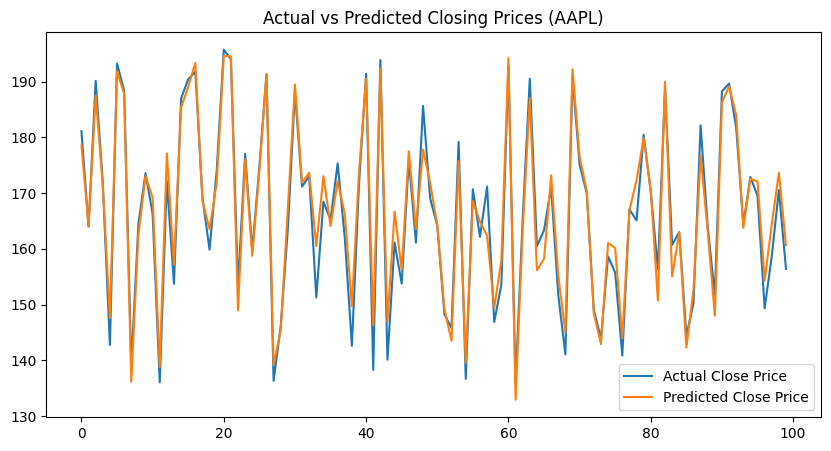

In [77]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")
plt.title("Actual vs Predicted Closing Prices (AAPL)")
plt.legend()
plt.show()

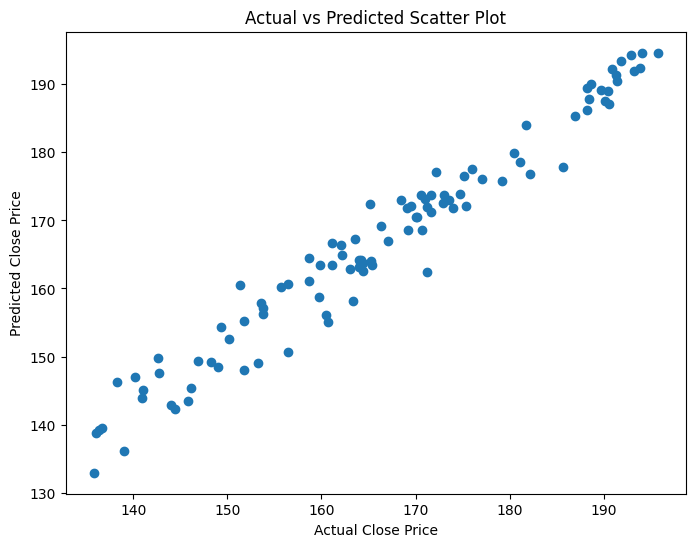

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Scatter Plot")
plt.show()